# FA maps with amyloid staging

In [1]:
%run /home/grg/git/alfa/nilearn-helper.py
import sys
import pandas as pd
sys.path.append('/home/grg/git/alfa/')
import amyl_multireg_spm12 as mreg
reload(mreg)
%matplotlib inline

/home/grg/jupyter/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


180212-18:33:08,900 interface WARNING:
	 Could not get linked libraries for "which".


In [ ]:
excel_fp = '/home/grg/SPM/2018/amylstaging_114_MD.xlsx'

analysis_name, ext = osp.splitext(osp.split(excel_fp)[1])
paramtype = analysis_name.split('_')[1]
analysis_wd = osp.join(osp.dirname(excel_fp), analysis_name)
spm = glob(osp.join(analysis_wd, 'estimatecontrasts/SPM.mat'))
#aal_fp = '/usr/local/MATLAB/R2014a/toolbox/spm12/toolbox/aal/ROI_MNI_V5.nii'
mask_fp = '/home/grg/spm/MNI_T1_brain_wo_csf.nii'
print 'Found SPM files:', spm
pd.read_excel(excel_fp).head()

Found SPM files: ['/home/grg/SPM/2018/amylstaging_114_MD/estimatecontrasts/SPM.mat']


In [4]:
print 'Reading', excel_fp, 'looking up column', paramtype, '...'
a = mreg.generic_version(excel_fp, analysis_wd, mask_fp, analysis_name)
n1 = a.get_node('modeldesign')
n3 = a.get_node('estimatecontrasts')
print '# of scans included in the analysis:', len(n1.inputs.in_files)
display_html(pd.DataFrame([e for e in n3.inputs.contrasts], 
             columns=['contrast name', 'contrast type', 'covariate names', 'covariate weights']))

Reading /tmp/ALFA_data_staging_FA.xlsx looking up column data ...
Analysis name: ALFA_data_staging_FA
First column: image
Columns in the model: [u'Stage0', u'Stage1', u'Stage2', u'Stage3', u'age', u'gender', u'apoe']
180126-16:11:23,573 workflow INFO:
	 Stage3>Stage2 detected
180126-16:11:23,574 workflow INFO:
	 Stage2>Stage1 detected
180126-16:11:23,575 workflow INFO:
	 Stage1>Stage0 detected
180126-16:11:23,575 workflow INFO:
	 Main effect Stage detected
180126-16:11:23,576 workflow INFO:
	 Dose-dependent effect detected
Effect of Gender
Effect of Linear age
Effect of # of E4 alleles
Analysis name: ALFA_data_staging_FA
Scans (110): [u'/home/grg/dartel_final/spm/FA/10019_FA_s.nii', u'/home/grg/dartel_final/spm/FA/10044_FA_s.nii', u'/home/grg/dartel_final/spm/FA/10065_FA_s.nii', u'/home/grg/dartel_final/spm/FA/10070_FA_s.nii', u'/home/grg/dartel_final/spm/FA/10137_FA_s.nii', u'/home/grg/dartel_final/spm/FA/10162_FA_s.nii', u'/home/grg/dartel_final/spm/FA/10200_FA_s.nii', u'/home/grg/da

,contrast name,contrast type,covariate names,covariate weights
0,Stage3>Stage2,T,"[Stage3, Stage2]","[1.0, -1.0]"
1,Stage2>Stage1,T,"[Stage2, Stage1]","[1.0, -1.0]"
2,Stage1>Stage0,T,"[Stage1, Stage0]","[1.0, -1.0]"
3,Main effect Stage,F,"[(Stage3>Stage2, T, [Stage3, Stage2], [1.0, -1...",None
4,Dose-dependent effect,T,"[Stage1, Stage2, Stage3]","[-1.0, 0.0, 1.0]"
5,Effect Gender,T,[gender],[1.0]
6,Effect Linear age,T,[age],[1.0]
7,Effect # of E4 alleles,T,[apoe],[1.0]


In [30]:
spm_mat_file = '/tmp/analysis_amylstaging/ALFA_data_staging/estimatecontrasts/SPM.mat'
out = pyAAL.pyAAL(spm_mat_file, 2, k=10, mode=2)
pyAAL.to_dataframe(out)

creating tempfile /tmp/tmpSwRmPd.m
matlab -nodisplay -nodesktop -nosplash -nojvm -r "addpath('/tmp/analysis_amylstaging/ALFA_data_staging/estimatecontrasts');run('/tmp/tmpSwRmPd');quit"

Contrast: Stage2>Stage1


,"x,y,z {mm}",nom du label,% Cluster,Nb Vx Cluster,% Label,Nb Vx Label,
0,14 -14 -22,Hippocampus_L,82.18,606,53.43,932,
1,14 -14 -22,ParaHippocampal_L,9.74,606,6.03,978,
2,14 -14 -22,Amygdala_L,6.77,606,18.64,220,
3,14 -14 -22,OUTSIDE,0.17,606,0.00,0,
4,-36 -2 48,Frontal_Mid_2_L,33.33,489,3.61,4509,
5,-36 -2 48,Frontal_Sup_2_L,30.47,489,3.06,4873,
6,-36 -2 48,Supp_Motor_Area_L,24.54,489,5.59,2147,
7,-36 -2 48,Precentral_L,0.61,489,0.09,3526,
8,-36 -2 48,OUTSIDE,0.20,489,0.00,0,
9,38 -4 52,Frontal_Mid_2_R,23.20,181,0.86,4860,


/tmp/analysis_amylstaging_FA/ALFA_data_staging_FA/estimatecontrasts/spmT_0001.nii T
Saving to... /tmp/tmpFioF1W.png
/tmp/analysis_amylstaging_FA/ALFA_data_staging_FA/estimatecontrasts/spmT_0002.nii T
Saving to... /tmp/tmpUuSYBd.png
/tmp/analysis_amylstaging_FA/ALFA_data_staging_FA/estimatecontrasts/spmT_0003.nii T
Saving to... /tmp/tmpbwPRVN.png
/tmp/analysis_amylstaging_FA/ALFA_data_staging_FA/estimatecontrasts/spmF_0004.nii F
Saving to... /tmp/tmpMCD0da.png
/tmp/analysis_amylstaging_FA/ALFA_data_staging_FA/estimatecontrasts/spmT_0005.nii T
Saving to... /tmp/tmp5ANRix.png
/tmp/analysis_amylstaging_FA/ALFA_data_staging_FA/estimatecontrasts/spmT_0006.nii T
Saving to... /tmp/tmp8m7T_Y.png
/tmp/analysis_amylstaging_FA/ALFA_data_staging_FA/estimatecontrasts/spmT_0007.nii T
Saving to... /tmp/tmpeSYcNf.png
/tmp/analysis_amylstaging_FA/ALFA_data_staging_FA/estimatecontrasts/spmT_0008.nii T
Saving to... /tmp/tmpok2FQv.png


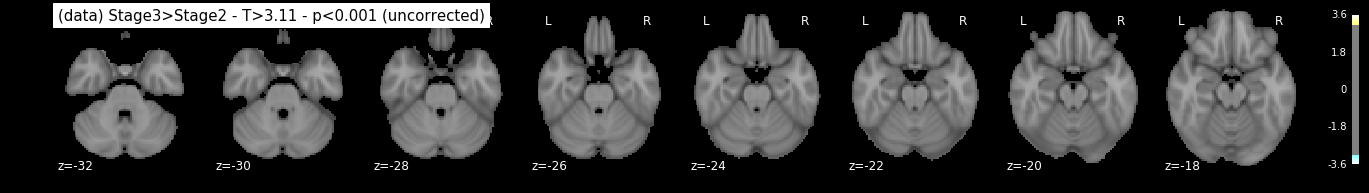

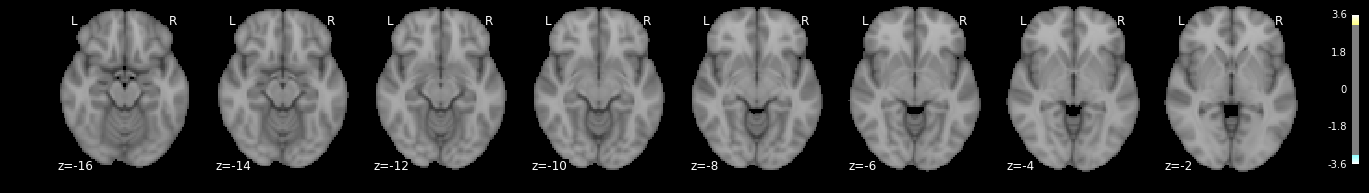

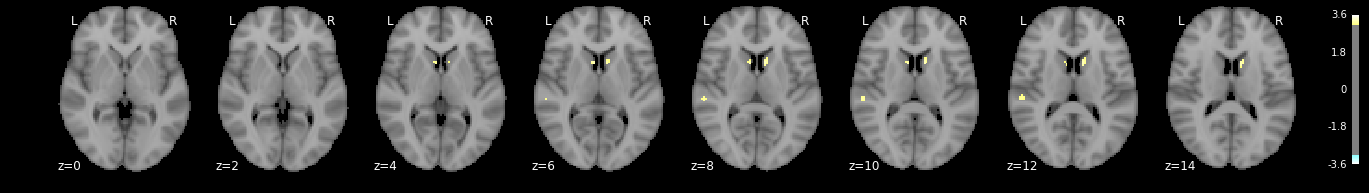

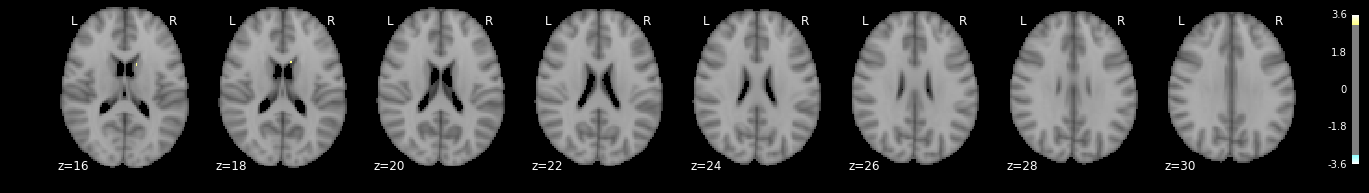

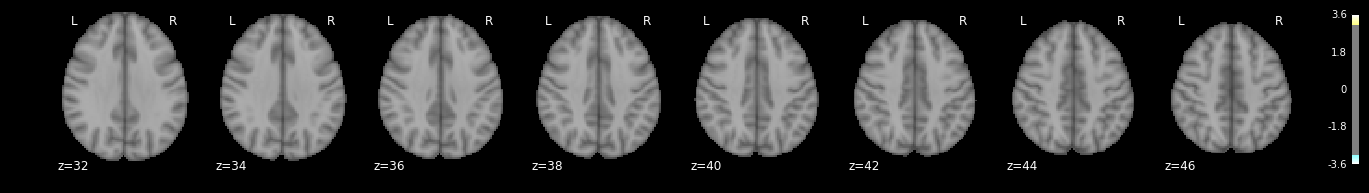

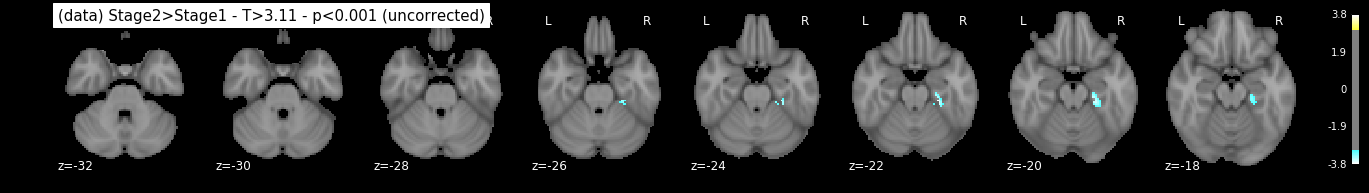

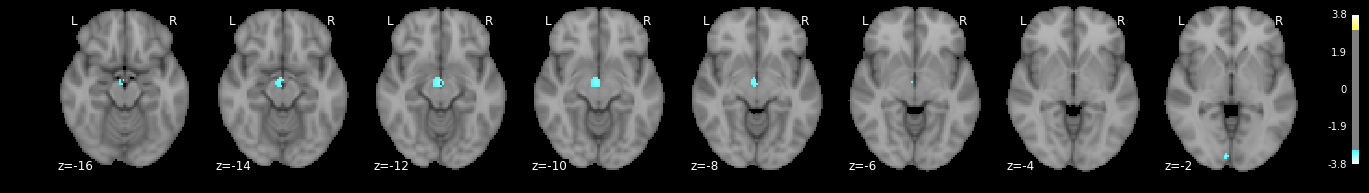

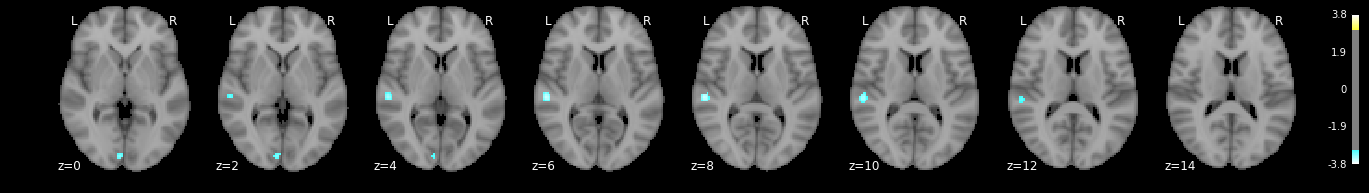

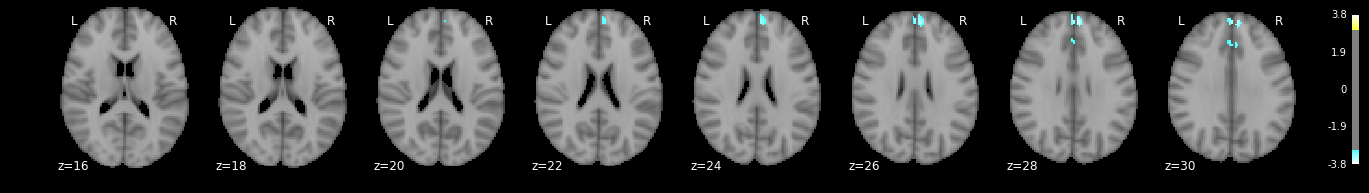

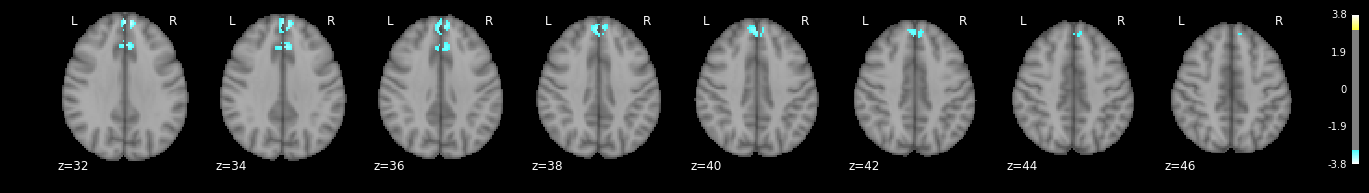

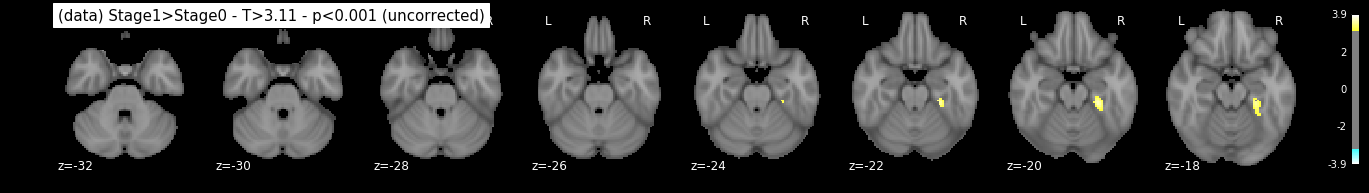

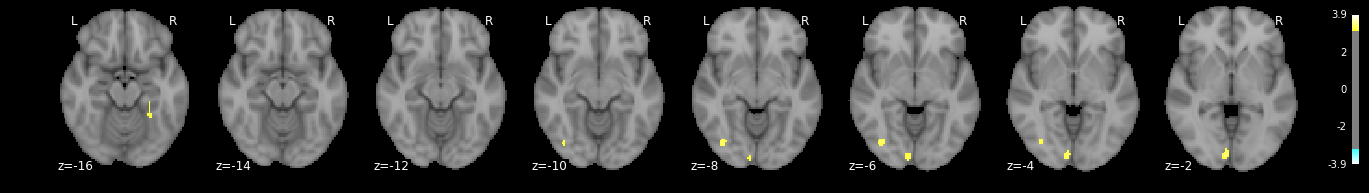

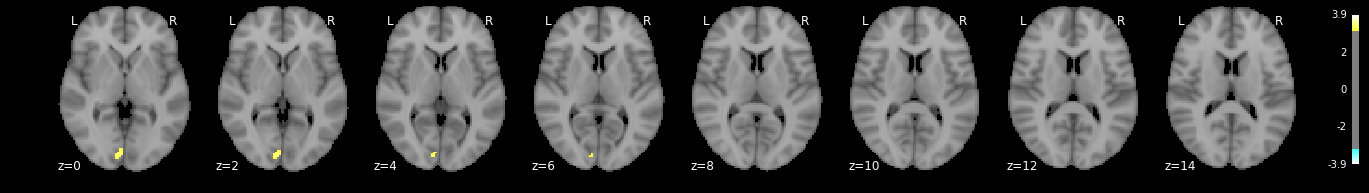

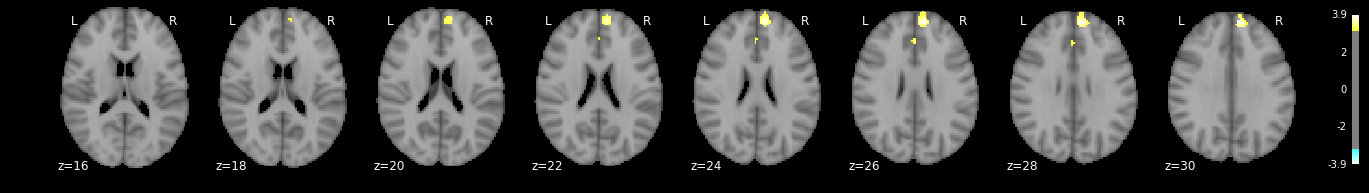

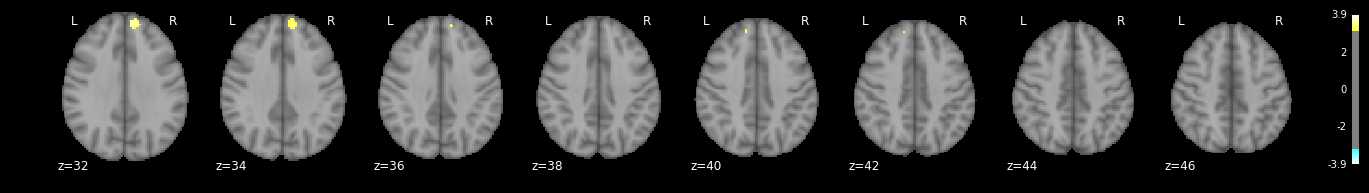

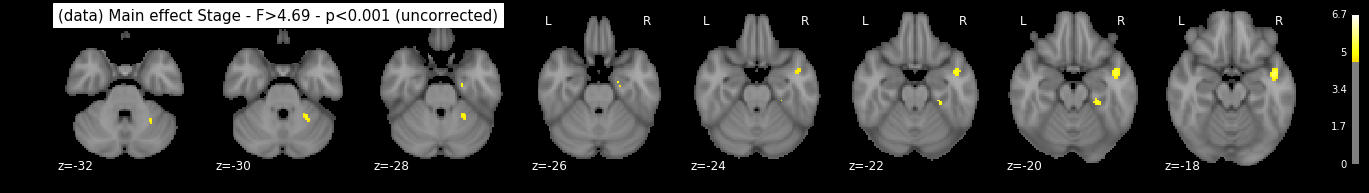

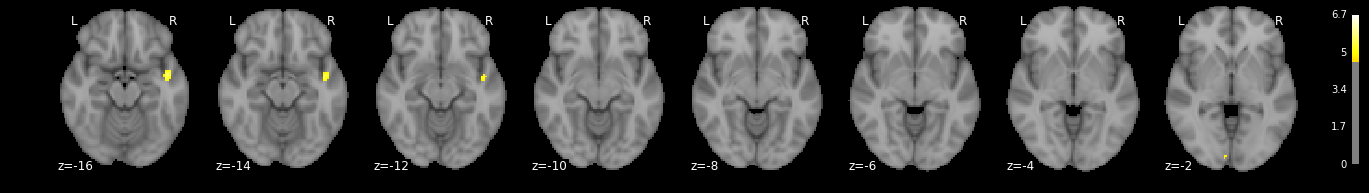

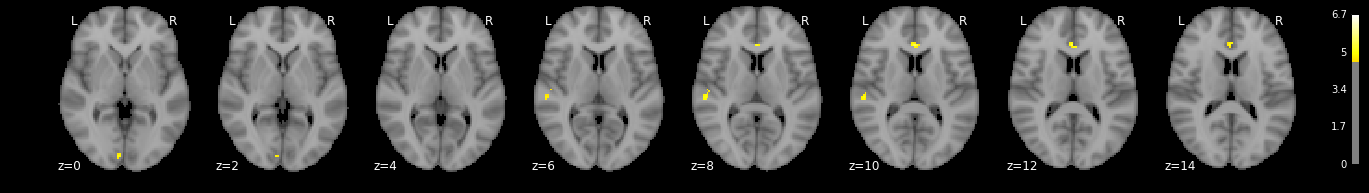

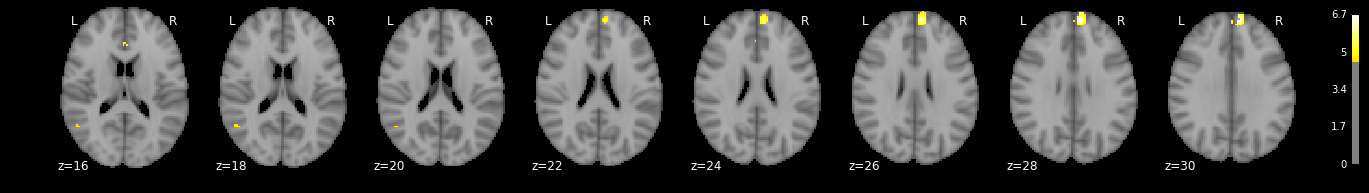

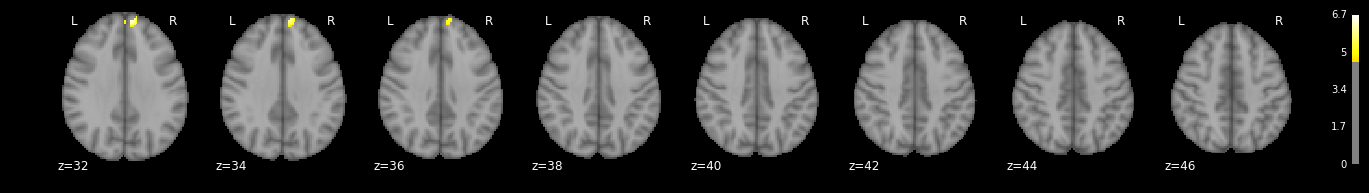

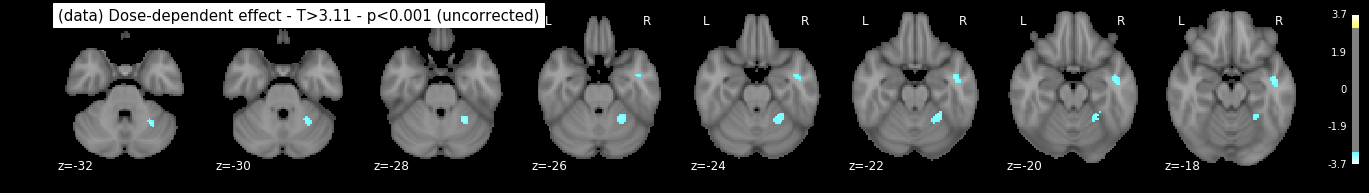

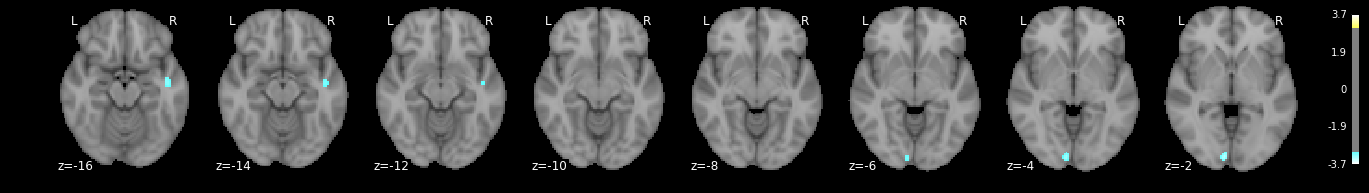

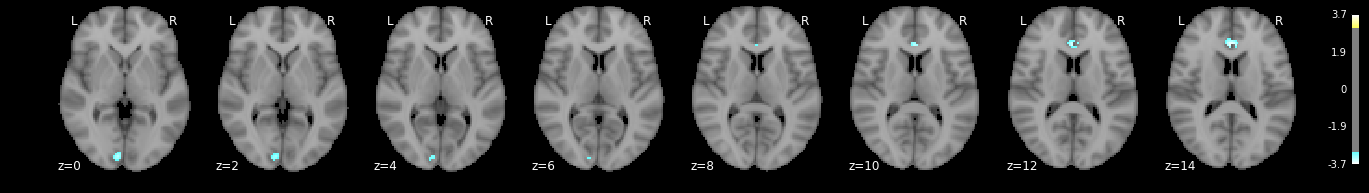

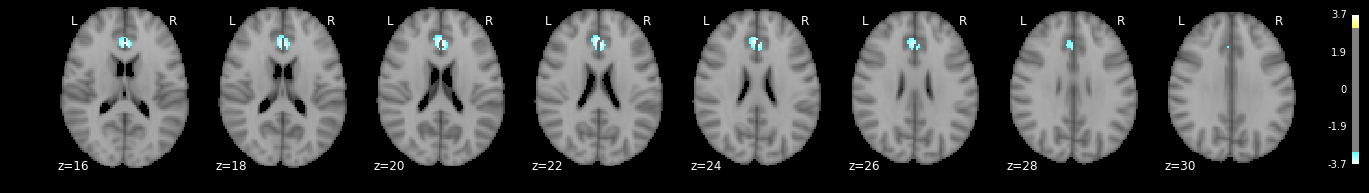

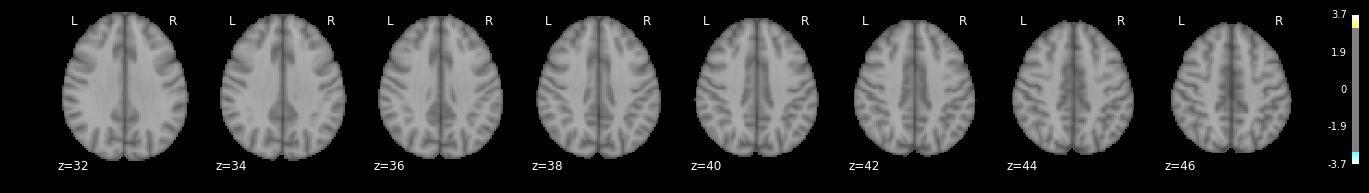

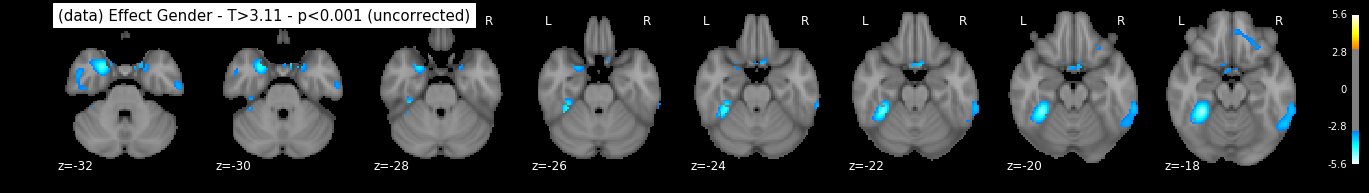

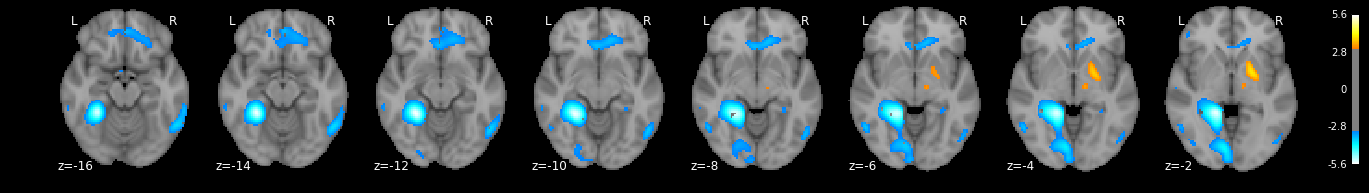

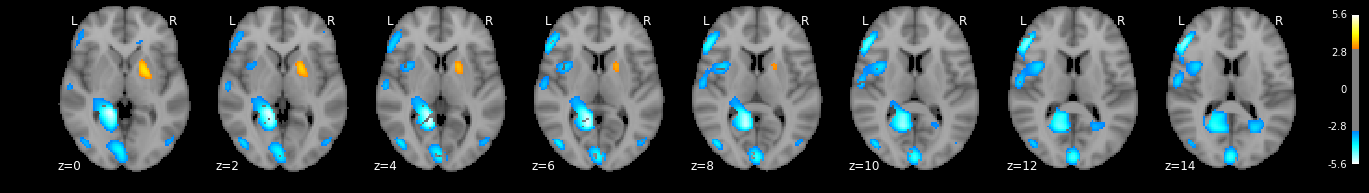

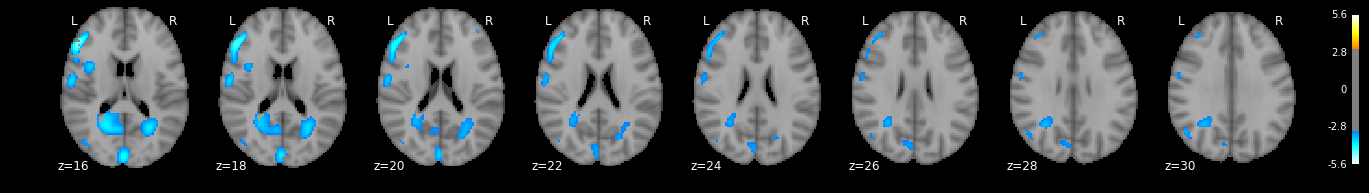

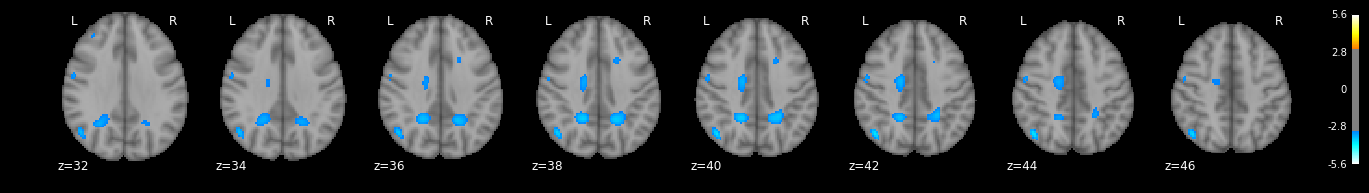

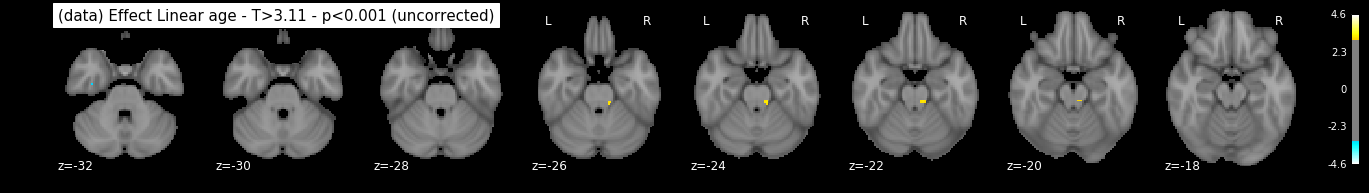

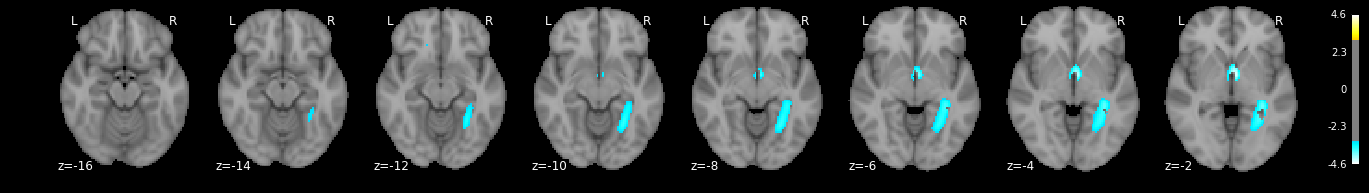

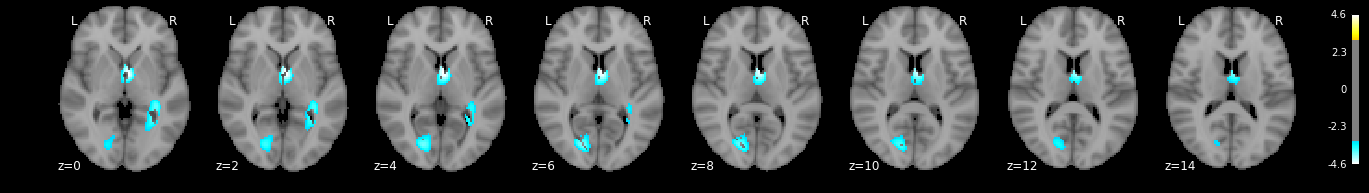

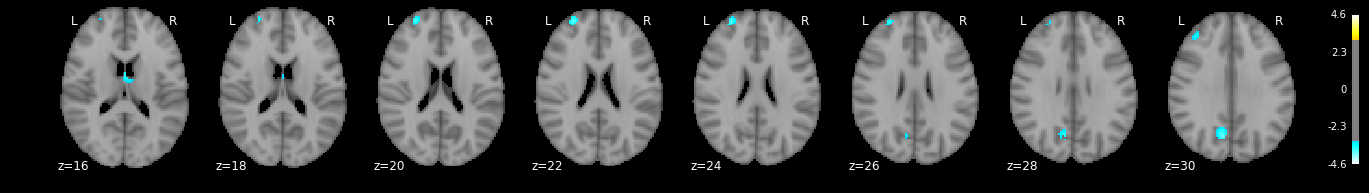

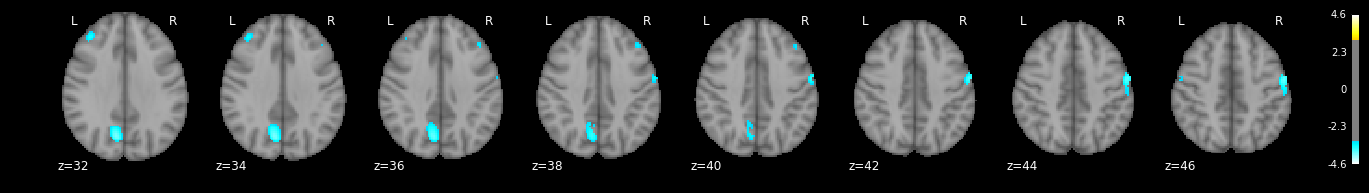

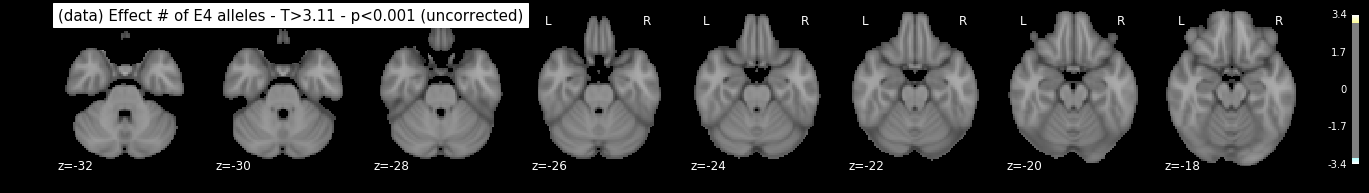

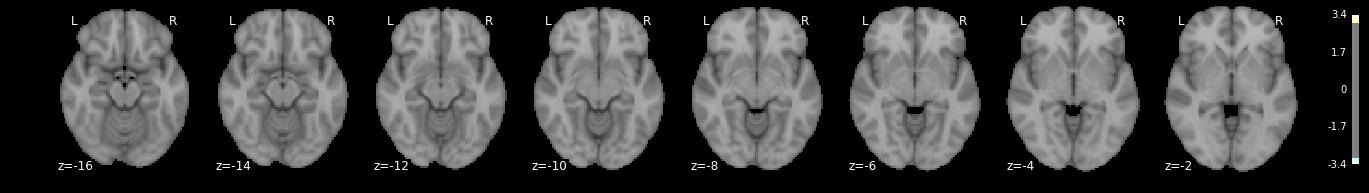

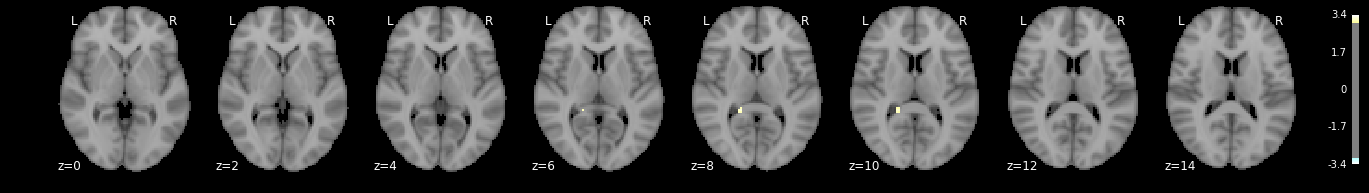

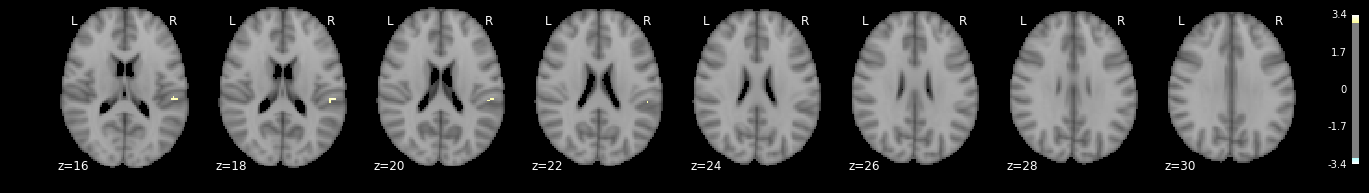

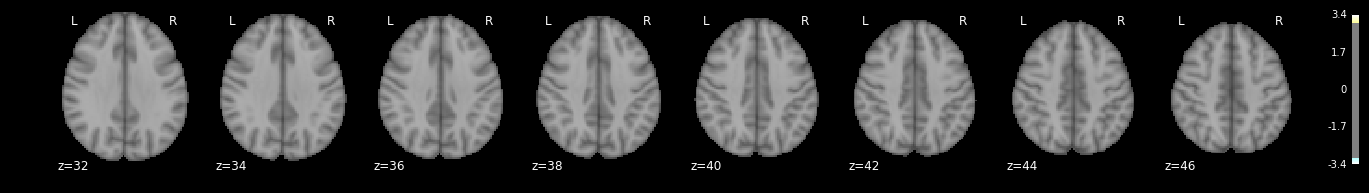

In [5]:
sections = sections_allcontrasts(analysis_wd, paramtype, axis='z', mode='uncorrected')